폴더에 있는 데이터를 train, validation으로 가져오는 방법

train용
- 'C:\\petImage\\training_set\\dogs'
- 'C:\\petImage\\training_set\\cats'

validation용
- 'C:\\petImage\\test_sett\\dogs'
- 'C:\\petImage\\test_set\\cats'

In [2]:
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras

img_w, img_h = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'C:\\petImage\\training_set',
        target_size=(img_w, img_h),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'C:\\petImage\\test_set',
        target_size=(img_w, img_h),
        batch_size=32,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [3]:
model = keras.models.load_model('catdog_model.h5')
model.summary()

model.fit(
        train_generator,
        epochs=1,
        validation_data=validation_generator)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [4]:
# 원본 이미지 회전, 확대, 반전 등의 확장 처리를 모두 150*150 픽셀로 리사이즈 한 것을
# flow_from_directory() 메소드가 저장되어있는 하위 디렉토리에서 생성할 수도 있지만 자동으로 생성되어 진행된다.

# CNN 확률 dogs(1)이 된다. 판정할 경우 0.5를 임계값으로 가지며
# 0.5 미만이면 cats, 0.5 이상이면 dogs가 된다.

print(train_generator.class_indices)
print(validation_generator.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


In [5]:
# 모델 컴파일 수행

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
# step 2 평가 단계(학습단계)

# model.fit(
#         train_generator,
#         epochs=1,
#         validation_data=validation_generator)

In [ ]:
# step 3 응용 단계

# 예측값 확인 및 예측률 확인
# numpy 리턴하는 이미지로 예측률을 확인해보자

In [ ]:
1. RNN 개념이해 _주가, 음성데이터, 음악, 문서, 기상
2. RNN 간단한 코드로 확인
3. RNN 모델을 이용한 검증, 예측률

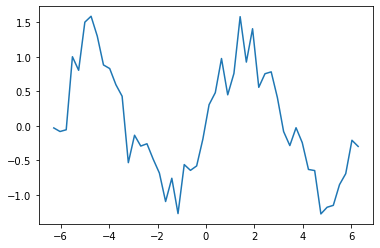

array([-6.28318531, -6.02672876, -5.77027222, -5.51381568, -5.25735913,
       -5.00090259, -4.74444605, -4.48798951, -4.23153296, -3.97507642,
       -3.71861988, -3.46216333, -3.20570679, -2.94925025, -2.6927937 ,
       -2.43633716, -2.17988062, -1.92342407, -1.66696753, -1.41051099,
       -1.15405444, -0.8975979 , -0.64114136, -0.38468481, -0.12822827,
        0.12822827,  0.38468481,  0.64114136,  0.8975979 ,  1.15405444,
        1.41051099,  1.66696753,  1.92342407,  2.17988062,  2.43633716,
        2.6927937 ,  2.94925025,  3.20570679,  3.46216333,  3.71861988,
        3.97507642,  4.23153296,  4.48798951,  4.74444605,  5.00090259,
        5.25735913,  5.51381568,  5.77027222,  6.02672876,  6.28318531])

In [6]:
# RNN 1
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi)  # 일반 범위 값 50개의 데이터

sin_data = np.sin(x_data) + 0.3*np.random.randn(len(x_data))  # 난수로 노이즈 더한값

plt.plot(x_data, sin_data)
plt.show()  # 그래프확인 하게되면 노이즈 부분이 플롯 된 것을 확인

x_data

In [8]:
# RNN 1-2 : 입력 데이터와 정답 데이터 작성

n_rnn = 15  # 시계열 수

n_sample = len(x_data) - n_rnn  # 샘플 50 - 15 = 35
i_data = np.zeros((n_sample, n_rnn))  # 입력
c_data = np.zeros((n_sample, n_rnn))  # 정답

for i in range(0, n_sample):
    i_data[i] = sin_data[i:i+n_rnn]  # x_data(데이터수 : 50)
    c_data[i] = sin_data[i+1:i+n_rnn+1]
#     print(i_data)

[[-0.03209923 -0.08386263 -0.058757    0.99971528  0.80336109  1.500651
   1.5863704   1.29827325  0.88066713  0.82836799  0.59419321  0.42726666
  -0.53518849 -0.13778925 -0.29471895]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.

   0.          0.          0.        ]]
[[-0.03209923 -0.08386263 -0.058757    0.99971528  0.80336109  1.500651
   1.5863704   1.29827325  0.88066713  0.82836799  0.59419321  0.42726666
  -0.53518849 -0.13778925 -0.29471895]
 [-0.08386263 -0.058757    0.99971528  0.80336109  1.500651    1.5863704
   1.29827325  0.88066713  0.82836799  0.59419321  0.42726666 -0.53518849
  -0.13778925 -0.29471895 -0.26125949]
 [-0.058757    0.99971528  0.80336109  1.500651    1.5863704   1.29827325
   0.88066713  0.82836799  0.59419321  0.42726666 -0.53518849 -0.13778925
  -0.29471895 -0.26125949 -0.48422021]
 [ 0.99971528  0.80336109  1.500651    1.5863704   1.29827325  0.88066713
   0.82836799  0.59419321  0.42726666 -0.53518849 -0.13778925 -0.29471895
  -0.26125949 -0.48422021 -0.68584169]
 [ 0.80336109  1.500651    1.5863704   1.29827325  0.88066713  0.82836799
   0.59419321  0.42726666 -0.53518849 -0.13778925 -0.29471895 -0.26125949
  -0.48422021 -0.68584169 -1.09813301]
 [ 1.500651    1.5863704   1

In [9]:
i_data = i_data.reshape(n_sample, n_rnn, 1)   # keras 원형 RNN 입력데이터 형식
c_data = c_data.reshape(n_sample, n_rnn, 1)

print(i_data.shape)
print(c_data.shape)

(35, 15, 1)
(35, 15, 1)


In [ ]:
# RNN 1-3

SimpleRNN : 전체 계층 중 중간층으로 재귀된다.
LSTM : 복잡한 시계열 데이터 처리, 학습시간이 오래걸린다.
GRU : LSTM의 단순버전으로 매개변수가 적기때문에 학습시간이 오래걸리지 않는다.

In [11]:
# RNN 1-3 모델 만들기
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

batch_size = 5  # 배치크기
n_in = 1  # 입력층 크기
n_mid = 20  # 중간층
n_out = 1  # 출력층

In [12]:
model = Sequential()

# SimpleRNN의 activation 기본값이 tanh 설정, input_shape(15-시계열수, 1_뉴런수)
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model.add(Dense(n_out, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='sgd')

model.summary()

# SimpleRNN의 Param = 440?
# 입력가중치 = 입력의 차수 * 숨어있는 차수 = 1*20
# 숨겨진 값 = 히든차수 * 히든차수 = 20*20
# 바이어스 = 히든차수 = 20

# model = Sequential()
# model.add(Embedding(4000, 32, input_shape=20)) = 4000*32 = 128000
# model.add(LSTM(64)) = 32*64*4 + 64*64*4 + 64*4 =
# model.add(SimpleRNN(64)) = 32*64*64*64 =
# model.add(GPU(64))

print()
print('============================================================')
print(len(model.layers[0].get_weights()), '\n')
i_w, h_w, bias = model.layers[0].get_weights()
print(i_w.size, h_w.size, bias.size)  # 20, 400, 20

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 15, 20)            440       
_________________________________________________________________
dense (Dense)                (None, 15, 1)             21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________

3 

20 400 20


In [13]:
# RNN 1-4 RNN 모델을 이용한 학습하기
history = model.fit(i_data, c_data, epochs=100, batch_size=batch_size, validation_split=0.1)

Epoch 1/100
7/7 [==============================] - 3s 117ms/step - loss: 0.6066 - val_loss: 0.2979
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 0.3183 - val_loss: 0.1748
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 0.2143 - val_loss: 0.1246
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.1793 - val_loss: 0.1100
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.1604 - val_loss: 0.1001
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1586 - val_loss: 0.0993
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1460 - val_loss: 0.0969
Epoch 8/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1462 - val_loss: 0.1004
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.1437 - val_loss: 0.1062
Epoch 10/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1413 - val_loss: 0.1012
Epoch 11/100
7/7 [

Epoch 84/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1121 - val_loss: 0.1086
Epoch 85/100
7/7 [==============================] - 0s 19ms/step - loss: 0.1145 - val_loss: 0.1114
Epoch 86/100
7/7 [==============================] - 0s 22ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 87/100
7/7 [==============================] - 0s 14ms/step - loss: 0.1139 - val_loss: 0.1130
Epoch 88/100
7/7 [==============================] - 0s 17ms/step - loss: 0.1124 - val_loss: 0.1120
Epoch 89/100
7/7 [==============================] - 0s 18ms/step - loss: 0.1118 - val_loss: 0.1052
Epoch 90/100
7/7 [==============================] - 0s 21ms/step - loss: 0.1099 - val_loss: 0.1084
Epoch 91/100
7/7 [==============================] - 0s 17ms/step - loss: 0.1073 - val_loss: 0.1085
Epoch 92/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1129 - val_loss: 0.1085
Epoch 93/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1127 - val_loss: 0.1104
Epoch 94/1

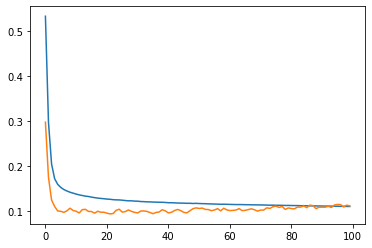

In [14]:
# RNN 1-5 손실률 시각화

loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

In [15]:
# RNN 1-6 예측률은 입력된 데이터를 활용하자
# i_data = x_data(데이터 개수 : 50)

predicted = i_data[0].reshape(-1)   # 입력데이터의 첫번째 행렬을 1차원 벡터로
predicted

array([-0.03209923, -0.08386263, -0.058757  ,  0.99971528,  0.80336109,
        1.500651  ,  1.5863704 ,  1.29827325,  0.88066713,  0.82836799,
        0.59419321,  0.42726666, -0.53518849, -0.13778925, -0.29471895])

In [16]:
for i in range(0, n_sample):
    y = model.predict(predicted[-n_rnn :].reshape(1, n_rnn, 1))
    predicted = np.append(predicted, y[0][n_rnn-1][0])

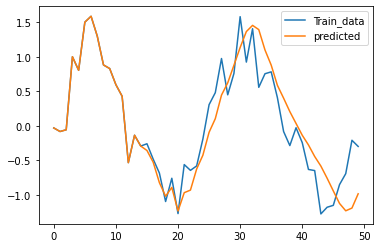

In [17]:
# 추가 데이터 예측률 시각화

plt.plot(np.arange(len(sin_data)), sin_data, label="Train_data")
plt.plot(np.arange(len(predicted)), predicted, label="predicted")
plt.legend()
plt.show()